In [2]:
# Setting up a custom stylesheet in IJulia
file = open("style.css") # A .css file in the same folder as this notebook file
styl = readall(file) # Read the file
HTML("$styl") # Output as HTML

HTML{String}("<link href='http://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\n<link href='http://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\n\n<style>\n\n@font-face {\n    font-family: \"Computer Modern\";\n    src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\n}\n\n#notebook_panel { /* main background */\n    background: #ddd;\n    color: #000000;\n}\n\n\n\n/* Formatting for header cells */\n.text_cell_render h1 {\n    font-family: 'Philosopher', sans-serif;\n    font-weight: 400;\n    font-size: 2.2em;\n    line-height: 100%;\n    color: rgb(0, 80, 120);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n.text_cell_render h2 {\n    font-family: 'Philosopher', serif;\n    font-weight: 400;\n    font-size: 1.9em;\n    line-height: 100%;\n    color: rgb(200,100,0);\n    margin-bottom: 0.1em;\n    margin-top: 0.1em;\n    display: block;\n}\t\n\n.text_cell_render h3 {\n    font-family: 'Philosopher', serif;\n    margin-top:12px;\n    margin-bottom: 3px;\n    font-style: italic;\n    color: rgb(94,127,192);\n}\n\n.text_cell_render h4 {\n    font-family: 'Philosopher', serif;\n}\n\n.text_cell_render h5 {\n    font-family: 'Alegreya Sans', sans-serif;\n    font-weight: 300;\n    font-size: 16pt;\n    color: grey;\n    font-style: italic;\n    margin-bottom: .1em;\n    margin-top: 0.1em;\n    display: block;\n}\n\n.text_cell_render h6 {\n    font-family: 'PT Mono', sans-serif;\n    font-weight: 300;\n    font-size: 10pt;\n    color: grey;\n    margin-bottom: 1px;\n    margin-top: 1px;\n}\n\n.CodeMirror{\n        font-family: \"PT Mono\";\n        font-size: 100%;\n}\n\n</style>\n\n")

<h1> Practice: fitting a circle to data </h1>

<h2>In this lecture</h2>

- [Outcome](#Outcome)
- [Plotting a circle with adjustable radius and centre](#Plotting-a-circle-with-adjustable-radius-and-centre)
- [Examples of making pretty pictures with several circles](#Examples-of-making-pretty-pictures-with-several-circles)
- [Pulling in and plotting the data](#Pulling-in-and-plotting-the-data)
- [Superimposing a circle on the data](#Superimposing-a-circle-on-the-data)
- [Adjusting the superimposed circle by hand](#Adjusting-the-superimposed-circle-by-hand)


[Back to the top](#In-this-lecture)

<h2>Outcome</h2>

After this lecture, you will be able to
- Make a parametric plot of a circle with given radius and position
- Superimpose a circle with arbitrary radius and position on a given data set
- Adjust your plotted circle by hand

And you will be fully prepared to do the peer-review assessment for Week 3 of this course.

[Back to the top](#In-this-lecture)

<h2> Plotting a circle with adjustable radius and centre </h2>

Let's make a function to draw a circle with radius $r$ and centre $(x_0, y_0)$. We will need Plots, and we'll use what is called parametric plotting, which is like tracing out a curve with a moving pencil tip. As time goes on, the pencil moves. So we specify the points in time (here, time will go from $0$ to $2\pi$), and for every point in time we give the position of the pencil tip. Of course, we've selected time to be equal to the angle between our current radius and the horizontal axis, so we use $(x, y) = (r\cos t, r\sin t)$. Here's the plotting function:

In [19]:
using Plots  # sets us up to make the figures

#specify the given values; these will be subject to change later
r = 5          #specifies the radius
x0, y0 = 1, 2  # note the simultaneous assignment of two variables to two values

# write the function
function trialcircle(r, x0, y0)
  t = linspace(0, 2π, 200)  #NB: the symbol for pi is made by \pi and pressing the Tab key
  x, y = r*cos(t), r*sin(t) #circle points relative to centre at the origin
  x, y = x+x0, y+y0         #this adds the shift to ALL the points    
  plot(x, y)                # can use aspect_ratio = 1 to get the same scale on both axes
end

trialcircle (generic function with 1 method)


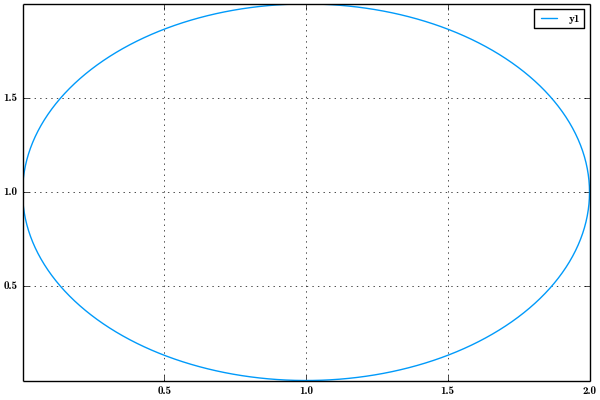

In [21]:
# Now let's try out the function ... maybe adjusting the aspect ratio

trialcircle(1,1,1)

[Back to the top](#In-this-lecture)

<h2> Examples of making pretty pictures with several circles </h2>

We can use trialcircle() to plot several circles on top of each other. For this, we need a version that plots on top of the old plot, that is, we need to use plot!() to make the plot. We'll call the new function trialcircle!(). Here's a simple example of two concentric circles. 

In [28]:
function trialcircle!(r, x0, y0)
  t = linspace(0, 2π, 200)  #NB: the symbol for pi is made by \pi and pressing the Tab key
  x, y = r*cos(t), r*sin(t) #circle points relative to centre at the origin
  x, y = x+x0, y+y0         #this adds the shift to ALL the points    
  plot!(x, y)                # can use aspect_ratio = 1 to get the same scale on both axes
end

trialcircle! (generic function with 1 method)


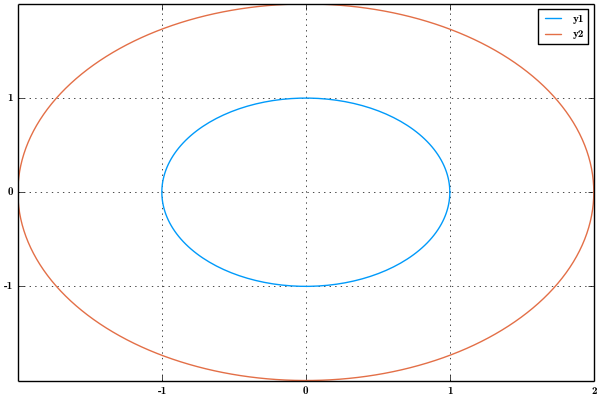

In [27]:
trialcircle(1, 0, 0)
trialcircle!(2, 0, 0)


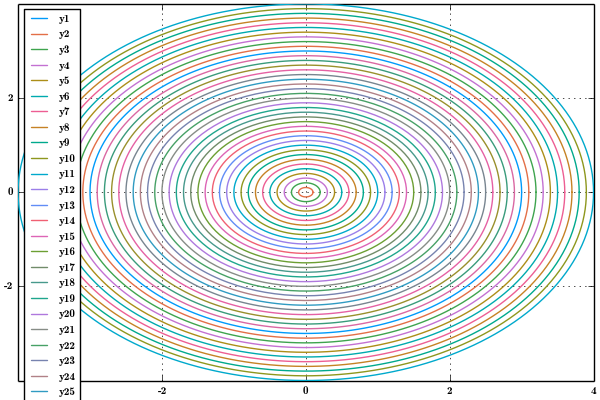

In [35]:
# Here's an example of many concentric circles 

trialcircle(0, 0, 0)  # the initial circle ... perfectly valid, but plots nothing!

for r = .1:.1:4
    trialcircle!(r, 0, 0)
end
plot!()   # need this to make sure the plot is displayed


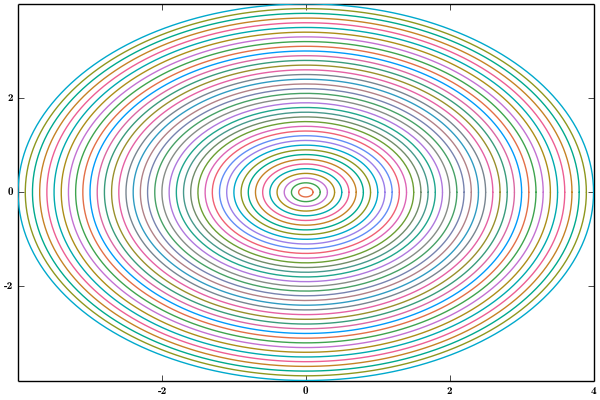

In [36]:
# we don't like the legend and the grid, so we turn them off
plot!(grid=false, legend=false)


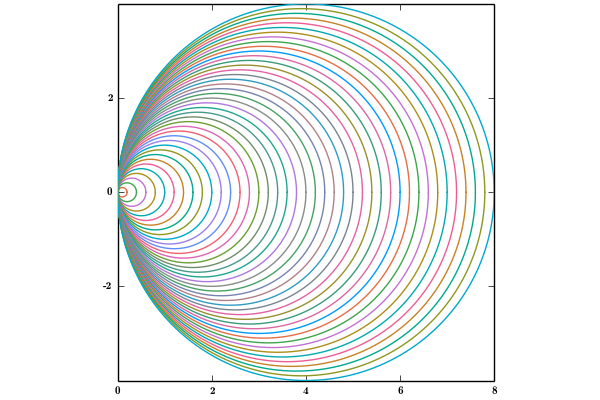

In [61]:
# Learning from this, adapting it to make contangential circles 

trialcircle(0, 0, 0)  # the initial circle ... perfectly valid, but plots nothing!

for r = .1:.1:4
    trialcircle!(r, r, 0)
end
plot!(legend=false, grid=false, aspect_ratio=1)   
# You might not like the colours. And yes, you can specify them ... but if you want to do so, you'd have 
# to rewrite the functions, and in particular the plot() and plot!() lines to use the colour or colours 
# you specify.
#
# Julia has very elegant ways to do this (by multiple dispatch), but this is an advanced topic not part of this course

[Back to the top](#In-this-lecture)

<h2> Pulling in and plotting the data </h2>

Now we pull in the data: it exists as comma-separated-values file called PracticeData.csv. We will pretend we don't know exaclty what the format is, and use the typeof() and size() functions to determine what we're working with.

Then, of course, we plot it using scatter() so as to be able to see just the actual points, not any lines joining them.

In [59]:
targetdat = readdlm("PracticeData.csv", ',')  # the second argument gives a character, 
                                              # here a comma, separating the values
typeof(targetdat)

Array{Float64,2}

In [60]:
size(targetdat)

(2,100)

We see that targedat is a matrix with 2 rows and 100 columns. So we assume that row 1 are the x values, and row 2 the y values that we should fit with a circle. Here is a first look at what we're being challenged with.


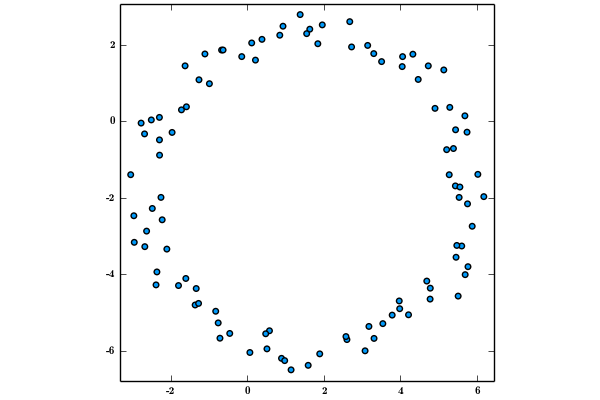

In [50]:
targetx, targety = targetdat[1,:], targetdat[2,:]  # note the use of the colon operator to indicate "all of this row"
scatter(targetx,targety, grid=false, legend=false, aspect_ratio=1)    # we've learnt a bit about grid, legend, etc ...

[Back to the top](#In-this-lecture)

<h2> Superimposing a circle on the data </h2>

Now let's see what the challenge is. We see the data is rougly circular, the $x$-coordinates run from roughly -2 to 6, and the $y$-coordinates from roughly -6 to 2. That seems to indicate a radius of about 4, centred on $x=2$ and $y=-2$. Let's plot the target with scatter() and superimpose a circle with those values with trialcircle!().


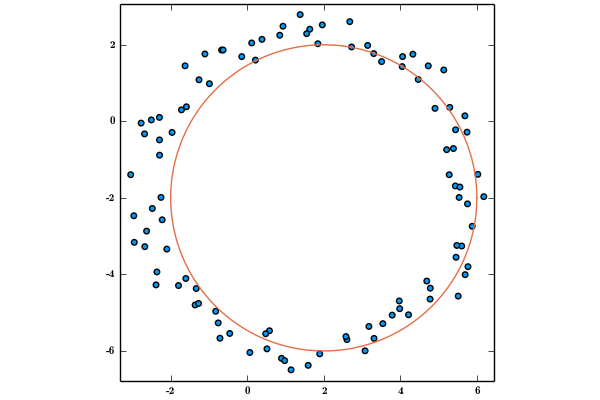

In [58]:
scatter(targetx,targety, grid=false, legend=false, aspect_ratio=1)
trialcircle!(4,2,-2)

[Back to the top](#In-this-lecture)

<h2> Adjusting the superimposed circle by hand </h2>

We see that the circle is over to the right and perhaps a tad low. So our centre needs a slightly smaller $x$-value and a slightly higher $y$-value. 

We don't need any new code to try that, we just run the cell above with changed values. As we get the centre better, we start seeing that the radius also needs adjustment. And then maybe adjust the centre again, and so on between the three values we can adjust.

<h3> Stopping </h3>

We could go on and on but we must recognise eventually that tine adjustments don't make a difference that worth the effort. The exact stopping criterion differs from problem to problem. In this case, we stop as soon as we see no real difference between one fit and the next. Yes, it is subjective and an obsessive person may never stop, but on the other hand there isn't a perfect way to define stopping criteria in numerical analysis either. It's one of those places where mathematics retains an inevitable subjectivity.

[Back to the top](#In-this-lecture)